In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import itertools
import gc
import os
import sys
%matplotlib inline

In [2]:
#memory saving function to https://www.kaggle.com/code/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [3]:
cab_rides= pd.read_csv('rideshare_kaggle.csv');
cab_rides= reduce_mem_usage(cab_rides)
weather_data = pd.read_csv('weather.csv')
weather_data= reduce_mem_usage(weather_data)

Memory usage of dataframe is 0.85 MB
Memory usage after optimization is: 0.40 MB
Decreased by 53.3%
Memory usage of dataframe is 0.06 MB
Memory usage after optimization is: 0.01 MB
Decreased by 77.0%


In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

# New Section

# New Section

In [4]:
cab_rides.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.127563,1.544980e+09,39.87500,1.545012e+09,43.68750,1.544969e+09,33.718750,1.545012e+09,38.06250,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.130005,1.543252e+09,40.50000,1.543234e+09,47.31250,1.543252e+09,36.187500,1.543291e+09,43.90625,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.106384,1.543338e+09,35.37500,1.543378e+09,47.56250,1.543320e+09,31.046875,1.543378e+09,44.12500,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.000000,1.543507e+09,34.65625,1.543550e+09,45.03125,1.543511e+09,30.296875,1.543550e+09,38.53125,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.000100,1.543421e+09,33.09375,1.543403e+09,42.18750,1.543421e+09,29.109375,1.543392e+09,35.75000,1.543421e+09


In [5]:
cab_rides.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [6]:
cab_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           1962 non-null   category
 1   timestamp                    1962 non-null   float32 
 2   hour                         1962 non-null   int8    
 3   day                          1962 non-null   int8    
 4   month                        1962 non-null   int8    
 5   datetime                     1962 non-null   category
 6   timezone                     1962 non-null   category
 7   source                       1962 non-null   category
 8   destination                  1962 non-null   category
 9   cab_type                     1962 non-null   category
 10  product_id                   1962 non-null   category
 11  name                         1962 non-null   category
 12  price                        1797 non-null   float16 
 13  dis

In [7]:
cab_rides.isnull().sum()

id                               0
timestamp                        0
hour                             0
day                              0
month                            0
datetime                         0
timezone                         0
source                           0
destination                      0
cab_type                         0
product_id                       0
name                             0
price                          165
distance                         0
surge_multiplier                 0
latitude                         0
longitude                        0
temperature                      0
apparentTemperature              0
short_summary                    0
long_summary                     0
precipIntensity                  0
precipProbability                0
humidity                         0
windSpeed                        0
windGust                         0
windGustTime                     0
visibility                       1
temperatureHigh     

In [ ]:
#cab_rides = cab_rides.drop(['latitude','longitude'],axis=1,inplace=True)


In [8]:
cab_rides.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.127563,1.544980e+09,39.87500,1.545012e+09,43.68750,1.544969e+09,33.718750,1.545012e+09,38.06250,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.130005,1.543252e+09,40.50000,1.543234e+09,47.31250,1.543252e+09,36.187500,1.543291e+09,43.90625,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.106384,1.543338e+09,35.37500,1.543378e+09,47.56250,1.543320e+09,31.046875,1.543378e+09,44.12500,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.000000,1.543507e+09,34.65625,1.543550e+09,45.03125,1.543511e+09,30.296875,1.543550e+09,38.53125,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.000100,1.543421e+09,33.09375,1.543403e+09,42.18750,1.543421e+09,29.109375,1.543392e+09,35.75000,1.543421e+09


In [9]:
cab_rides = cab_rides.drop(['apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'windSpeed'],axis=1)

In [10]:
cab_rides.drop(['windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'windBearing', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'],axis=1,inplace=True)

In [11]:
cab_rides.columns


Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'humidity', 'pressure', 'cloudCover'],
      dtype='object')

In [12]:
weather_data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
#cab_rides.drop(['day','hour'],axis=1)

,id,timestamp,month,datetime,timezone,source,destination,cab_type,product_id,name,...,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,pressure,cloudCover
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,42.34375,37.12500,Mostly Cloudy,Rain throughout the day.,0.000000,0.0,0.680176,8.656250,1022.0,0.720215
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,43.59375,37.34375,Rain,"Rain until morning, starting again in the eve...",0.129883,1.0,0.939941,11.976562,1004.0,1.000000
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,...,38.34375,32.93750,Clear,Light rain in the morning.,0.000000,0.0,0.750000,7.328125,992.5,0.029999
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,34.37500,29.62500,Clear,Partly cloudy throughout the day.,0.000000,0.0,0.729980,5.281250,1013.5,0.000000
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,37.43750,30.87500,Partly Cloudy,Mostly cloudy throughout the day.,0.000000,0.0,0.700195,9.140625,998.5,0.439941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23705,bab88976-2955-4689-ad6b-410494652bf4,1.543299e+09,11,2018-11-27 06:06:22,America/New_York,West End,North End,Lyft,lyft_premier,Lux,...,43.03125,36.78125,Light Rain,Light rain in the morning.,0.067383,1.0,0.930176,11.617188,996.5,1.000000
23706,717cd5ac-8754-4fb7-9cb2-2b01aee765d4,1.543360e+09,11,2018-11-27 23:06:22,America/New_York,Boston University,Financial District,Lyft,lyft_lux,Lux Black,...,40.37500,35.18750,Partly Cloudy,Light rain in the morning.,0.000000,0.0,0.709961,7.730469,992.0,0.130005
23707,835281c1-021b-4b99-9f90-25c8ba16d068,1.543445e+09,11,2018-11-28 22:38:07,America/New_York,Boston University,Financial District,Lyft,lyft_luxsuv,Lux Black XL,...,40.43750,34.59375,Overcast,Mostly cloudy throughout the day.,0.000000,0.0,0.640137,9.078125,995.0,1.000000
23708,a6c8e895-8009-415e-a6f0-7e51aed61072,1.543407e+09,11,2018-11-28 12:17:08,America/New_York,Boston University,Financial District,Lyft,lyft,Lyft,...,36.53125,32.06250,Mostly Cloudy,Mostly cloudy throughout the day.,0.000000,0.0,0.709961,5.421875,991.5,0.540039


In [13]:
import datetime
cab_rides['datetime']= pd.to_datetime(cab_rides['timestamp'])
cab_rides


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,name,price,distance,surge_multiplier,latitude,longitude,temperature,humidity,pressure,cloudCover
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,1970-01-01 00:00:01.544952576,America/New_York,Haymarket Square,North Station,Lyft,...,Shared,5.0,0.439941,1.0,42.21875,-71.0625,42.343750,0.680176,1022.0,0.720215
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,1970-01-01 00:00:01.543283968,America/New_York,Haymarket Square,North Station,Lyft,...,Lux,11.0,0.439941,1.0,42.21875,-71.0625,43.593750,0.939941,1004.0,1.000000
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,1970-01-01 00:00:01.543366784,America/New_York,Haymarket Square,North Station,Lyft,...,Lyft,7.0,0.439941,1.0,42.21875,-71.0625,38.343750,0.750000,992.5,0.029999
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,1970-01-01 00:00:01.543553536,America/New_York,Haymarket Square,North Station,Lyft,...,Lux Black XL,26.0,0.439941,1.0,42.21875,-71.0625,34.375000,0.729980,1013.5,0.000000
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,1970-01-01 00:00:01.543463424,America/New_York,Haymarket Square,North Station,Lyft,...,Lyft XL,9.0,0.439941,1.0,42.21875,-71.0625,37.437500,0.700195,998.5,0.439941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,fd3167a5-1ef5-42ad-8100-e060088aa294,1.543568e+09,8,30,11,1970-01-01 00:00:01.543568256,America/New_York,North End,North Station,Uber,...,WAV,7.0,0.300049,1.0,42.34375,-71.0625,30.093750,0.850098,1015.0,0.000000
1958,0135c089-518c-4728-9dd6-7aa51750475c,1.544784e+09,10,14,12,1970-01-01 00:00:01.544784256,America/New_York,South Station,Financial District,Uber,...,UberPool,6.5,0.629883,1.0,42.34375,-71.0625,27.703125,0.790039,1034.0,0.140015
1959,34f53769-b730-4f94-a938-a293f1da03de,1.543419e+09,15,28,11,1970-01-01 00:00:01.543419136,America/New_York,South Station,Financial District,Uber,...,Black SUV,26.5,0.629883,1.0,42.34375,-71.0625,41.250000,0.600098,991.5,0.740234
1960,4597b0a5-2ecd-402f-af65-e0c3e5dac614,1.543512e+09,17,29,11,1970-01-01 00:00:01.543511552,America/New_York,South Station,Financial District,Uber,...,Black,16.0,0.629883,1.0,42.34375,-71.1250,43.906250,0.500000,1006.5,0.310059


In [14]:
cab_rides.shape

(1962, 21)

In [15]:
weather_data.shape

(366, 22)

In [16]:
cab_rides.isna().sum()

id                    0
timestamp             0
hour                  0
day                   0
month                 0
datetime              0
timezone              0
source                0
destination           0
cab_type              0
product_id            0
name                  0
price               165
distance              0
surge_multiplier      0
latitude              0
longitude             0
temperature           0
humidity              0
pressure              1
cloudCover            1
dtype: int64

In [17]:
cab_rides = cab_rides.dropna()

In [18]:
cab_rides.isna().sum()

id                  0
timestamp           0
hour                0
day                 0
month               0
datetime            0
timezone            0
source              0
destination         0
cab_type            0
product_id          0
name                0
price               0
distance            0
surge_multiplier    0
latitude            0
longitude           0
temperature         0
humidity            0
pressure            0
cloudCover          0
dtype: int64

In [19]:
cab_rides.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,humidity,pressure,cloudCover
count,1.796000e+03,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000
mean,1.544025e+09,11.501670,18.222717,11.564588,16.343750,2.117188,1.009766,inf,-inf,inf,0.739746,inf,0.679688
std,6.877326e+05,7.037306,9.923184,0.495949,8.984375,1.044922,0.081848,0.049927,0.023926,6.773438,0.139160,13.609375,0.363525
min,1.543209e+09,0.000000,1.000000,11.000000,3.000000,0.300049,1.000000,42.218750,-71.125000,18.906250,0.379883,988.000000,0.000000
25%,1.543433e+09,6.000000,13.000000,11.000000,9.000000,1.250000,1.000000,42.343750,-71.062500,36.531250,0.640137,999.500000,0.370117
50%,1.543711e+09,12.000000,17.000000,12.000000,13.500000,2.070312,1.000000,42.343750,-71.062500,40.562500,0.709961,1007.500000,0.819824
75%,1.544809e+09,18.000000,28.000000,12.000000,22.500000,2.880859,1.000000,42.375000,-71.062500,43.625000,0.882446,1021.500000,1.000000
max,1.545160e+09,23.000000,30.000000,12.000000,67.500000,7.460938,2.500000,42.375000,-71.062500,57.218750,0.959961,1036.000000,1.000000


In [20]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.269531,20.546875,1.428711,4.523438,7.910156,39.843750,9.648438,17.986339,72.035519,44.519126,inf,inf,3.890710,4.024590,12.359375,19.234375,1.428711
std,6.027344,6.691406,4.226562,2.669922,3.482422,13.054688,7.949219,8.856997,13.137058,16.850947,6.683594,6.464844,2.956131,2.666268,5.628906,6.640625,4.226562
min,-5.300781,7.601562,0.000000,0.199951,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,997.000000,0.000000,0.000000,0.099976,5.101562,0.000000
25%,2.300781,15.025391,0.000000,2.199219,5.949219,31.000000,6.000000,11.000000,64.000000,32.250000,1015.500000,1013.000000,1.000000,1.000000,7.625977,14.150391,0.000000
50%,7.449219,19.648438,0.000000,4.199219,8.601562,39.000000,7.000000,17.000000,72.000000,43.000000,1020.000000,1017.500000,3.500000,4.000000,12.550781,18.546875,0.000000
75%,12.500000,25.500000,0.199951,6.398438,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.000000,1021.500000,7.000000,7.000000,17.000000,24.000000,0.199951
max,20.906250,35.812500,39.812500,13.796875,13.601562,98.000000,41.000000,52.000000,99.000000,96.000000,1036.000000,1033.000000,8.000000,8.000000,24.703125,34.500000,39.812500


In [21]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MinTemp        366 non-null    float16 
 1   MaxTemp        366 non-null    float16 
 2   Rainfall       366 non-null    float16 
 3   Evaporation    366 non-null    float16 
 4   Sunshine       363 non-null    float16 
 5   WindGustDir    363 non-null    category
 6   WindGustSpeed  364 non-null    float16 
 7   WindDir9am     335 non-null    category
 8   WindDir3pm     365 non-null    category
 9   WindSpeed9am   359 non-null    float16 
 10  WindSpeed3pm   366 non-null    int8    
 11  Humidity9am    366 non-null    int8    
 12  Humidity3pm    366 non-null    int8    
 13  Pressure9am    366 non-null    float16 
 14  Pressure3pm    366 non-null    float16 
 15  Cloud9am       366 non-null    int8    
 16  Cloud3pm       366 non-null    int8    
 17  Temp9am        366 non-null    floa

In [22]:
weather_data.isna().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [23]:
weather_data = weather_data.dropna()

In [24]:
a = cab_rides.join(weather_data)

In [10]:
#a=pd.concat([cab_rides,weather_data])

In [30]:
a.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9.0,16.0,12.0,1970-01-01 00:00:01.544952576,America/New_York,Haymarket Square,North Station,Lyft,...,29.0,1019.5,1015.0,7.0,7.0,14.398438,23.593750,No,3.599609,Yes
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2.0,27.0,11.0,1970-01-01 00:00:01.543283968,America/New_York,Haymarket Square,North Station,Lyft,...,36.0,1012.5,1008.5,5.0,3.0,17.500000,25.703125,Yes,3.599609,Yes
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1.0,28.0,11.0,1970-01-01 00:00:01.543366784,America/New_York,Haymarket Square,North Station,Lyft,...,69.0,1009.5,1007.0,8.0,7.0,15.398438,20.203125,Yes,39.812500,Yes
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4.0,30.0,11.0,1970-01-01 00:00:01.543553536,America/New_York,Haymarket Square,North Station,Lyft,...,56.0,1005.5,1007.0,2.0,7.0,13.500000,14.101562,Yes,2.800781,Yes
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3.0,29.0,11.0,1970-01-01 00:00:01.543463424,America/New_York,Haymarket Square,North Station,Lyft,...,49.0,1018.5,1018.5,7.0,7.0,11.101562,15.398438,Yes,0.000000,No


In [25]:
a['day']=a.datetime.dt.day
a['hour']=a.datetime.dt.hour

In [26]:
a.isnull().sum()

id                     0
timestamp              0
hour                   0
day                    0
month                  0
datetime               0
timezone               0
source                 0
destination            0
cab_type               0
product_id             0
name                   0
price                  0
distance               0
surge_multiplier       0
latitude               0
longitude              0
temperature            0
humidity               0
pressure               0
cloudCover             0
MinTemp             1494
MaxTemp             1494
Rainfall            1494
Evaporation         1494
Sunshine            1494
WindGustDir         1494
WindGustSpeed       1494
WindDir9am          1494
WindDir3pm          1494
WindSpeed9am        1494
WindSpeed3pm        1494
Humidity9am         1494
Humidity3pm         1494
Pressure9am         1494
Pressure3pm         1494
Cloud9am            1494
Cloud3pm            1494
Temp9am             1494
Temp3pm             1494


In [ ]:
#a.drop(a[a.isna()].index,axis=1,inplace=True)




In [27]:
#a = a.drop(['WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',
#'Cloud9am'],axis=1,inplace=True)

In [27]:
a.isna().sum()

id                     0
timestamp              0
hour                   0
day                    0
month                  0
datetime               0
timezone               0
source                 0
destination            0
cab_type               0
product_id             0
name                   0
price                  0
distance               0
surge_multiplier       0
latitude               0
longitude              0
temperature            0
humidity               0
pressure               0
cloudCover             0
MinTemp             1494
MaxTemp             1494
Rainfall            1494
Evaporation         1494
Sunshine            1494
WindGustDir         1494
WindGustSpeed       1494
WindDir9am          1494
WindDir3pm          1494
WindSpeed9am        1494
WindSpeed3pm        1494
Humidity9am         1494
Humidity3pm         1494
Pressure9am         1494
Pressure3pm         1494
Cloud9am            1494
Cloud3pm            1494
Temp9am             1494
Temp3pm             1494


In [28]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1796 entries, 0 to 1960
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1796 non-null   category      
 1   timestamp         1796 non-null   float32       
 2   hour              1796 non-null   int64         
 3   day               1796 non-null   int64         
 4   month             1796 non-null   int8          
 5   datetime          1796 non-null   datetime64[ns]
 6   timezone          1796 non-null   category      
 7   source            1796 non-null   category      
 8   destination       1796 non-null   category      
 9   cab_type          1796 non-null   category      
 10  product_id        1796 non-null   category      
 11  name              1796 non-null   category      
 12  price             1796 non-null   float16       
 13  distance          1796 non-null   float16       
 14  surge_multiplier  1796 n

In [29]:
a= a.dropna()
a.fillna(0,inplace=True)

<ipython-input-29-ed844e2514a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.fillna(0,inplace=True)


In [30]:
a.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,0,1,12,1970-01-01 00:00:01.544952576,America/New_York,Haymarket Square,North Station,Lyft,...,29.0,1019.5,1015.0,7.0,7.0,14.398438,23.593750,No,3.599609,Yes
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,0,1,11,1970-01-01 00:00:01.543283968,America/New_York,Haymarket Square,North Station,Lyft,...,36.0,1012.5,1008.5,5.0,3.0,17.500000,25.703125,Yes,3.599609,Yes
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,0,1,11,1970-01-01 00:00:01.543366784,America/New_York,Haymarket Square,North Station,Lyft,...,69.0,1009.5,1007.0,8.0,7.0,15.398438,20.203125,Yes,39.812500,Yes
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,0,1,11,1970-01-01 00:00:01.543553536,America/New_York,Haymarket Square,North Station,Lyft,...,56.0,1005.5,1007.0,2.0,7.0,13.500000,14.101562,Yes,2.800781,Yes
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,0,1,11,1970-01-01 00:00:01.543463424,America/New_York,Haymarket Square,North Station,Lyft,...,49.0,1018.5,1018.5,7.0,7.0,11.101562,15.398438,Yes,0.000000,No


In [31]:
a['day']=a.datetime.dt.day
a['hour']=a.datetime.dt.hour

In [61]:
a.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,0,1,12.0,1970-01-01 00:00:01.544952576,America/New_York,Haymarket Square,North Station,Lyft,...,29.0,1019.5,1015.0,7.0,7.0,14.398438,23.593750,No,3.599609,Yes
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,0,1,11.0,1970-01-01 00:00:01.543283968,America/New_York,Haymarket Square,North Station,Lyft,...,36.0,1012.5,1008.5,5.0,3.0,17.500000,25.703125,Yes,3.599609,Yes
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,0,1,11.0,1970-01-01 00:00:01.543366784,America/New_York,Haymarket Square,North Station,Lyft,...,69.0,1009.5,1007.0,8.0,7.0,15.398438,20.203125,Yes,39.812500,Yes
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,0,1,11.0,1970-01-01 00:00:01.543553536,America/New_York,Haymarket Square,North Station,Lyft,...,56.0,1005.5,1007.0,2.0,7.0,13.500000,14.101562,Yes,2.800781,Yes
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,0,1,11.0,1970-01-01 00:00:01.543463424,America/New_York,Haymarket Square,North Station,Lyft,...,49.0,1018.5,1018.5,7.0,7.0,11.101562,15.398438,Yes,0.000000,No


In [32]:
a.isna().sum()

id                  0
timestamp           0
hour                0
day                 0
month               0
datetime            0
timezone            0
source              0
destination         0
cab_type            0
product_id          0
name                0
price               0
distance            0
surge_multiplier    0
latitude            0
longitude           0
temperature         0
humidity            0
pressure            0
cloudCover          0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RISK_MM             0
RainTomorrow        0
dtype: int64

In [33]:
a.groupby('cab_type').count()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,product_id,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
cab_type,,,,,,,,,,,,,,,,,,,,,
Lyft,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
Uber,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,152,152


<Axes: xlabel='cab_type'>

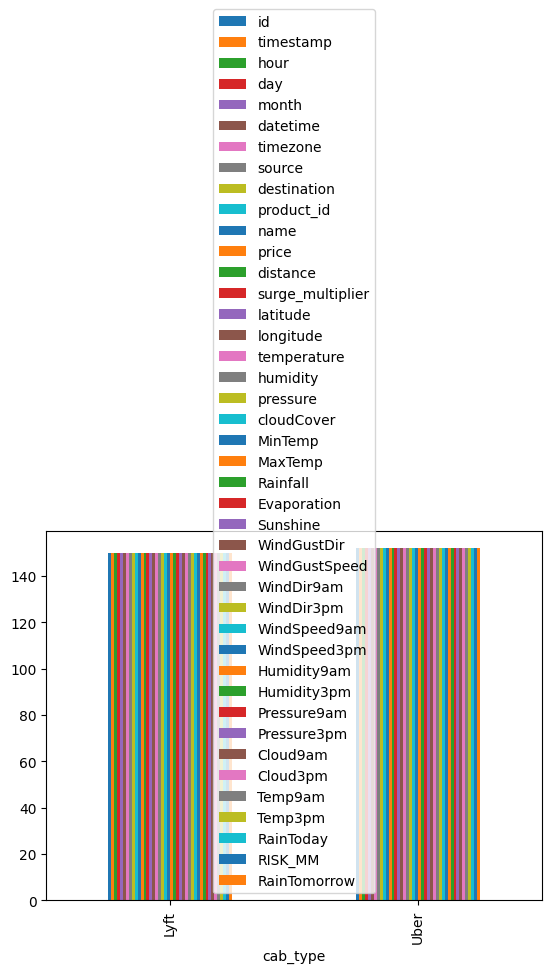

In [34]:
a.groupby('cab_type').count().plot.bar()

<Axes: >

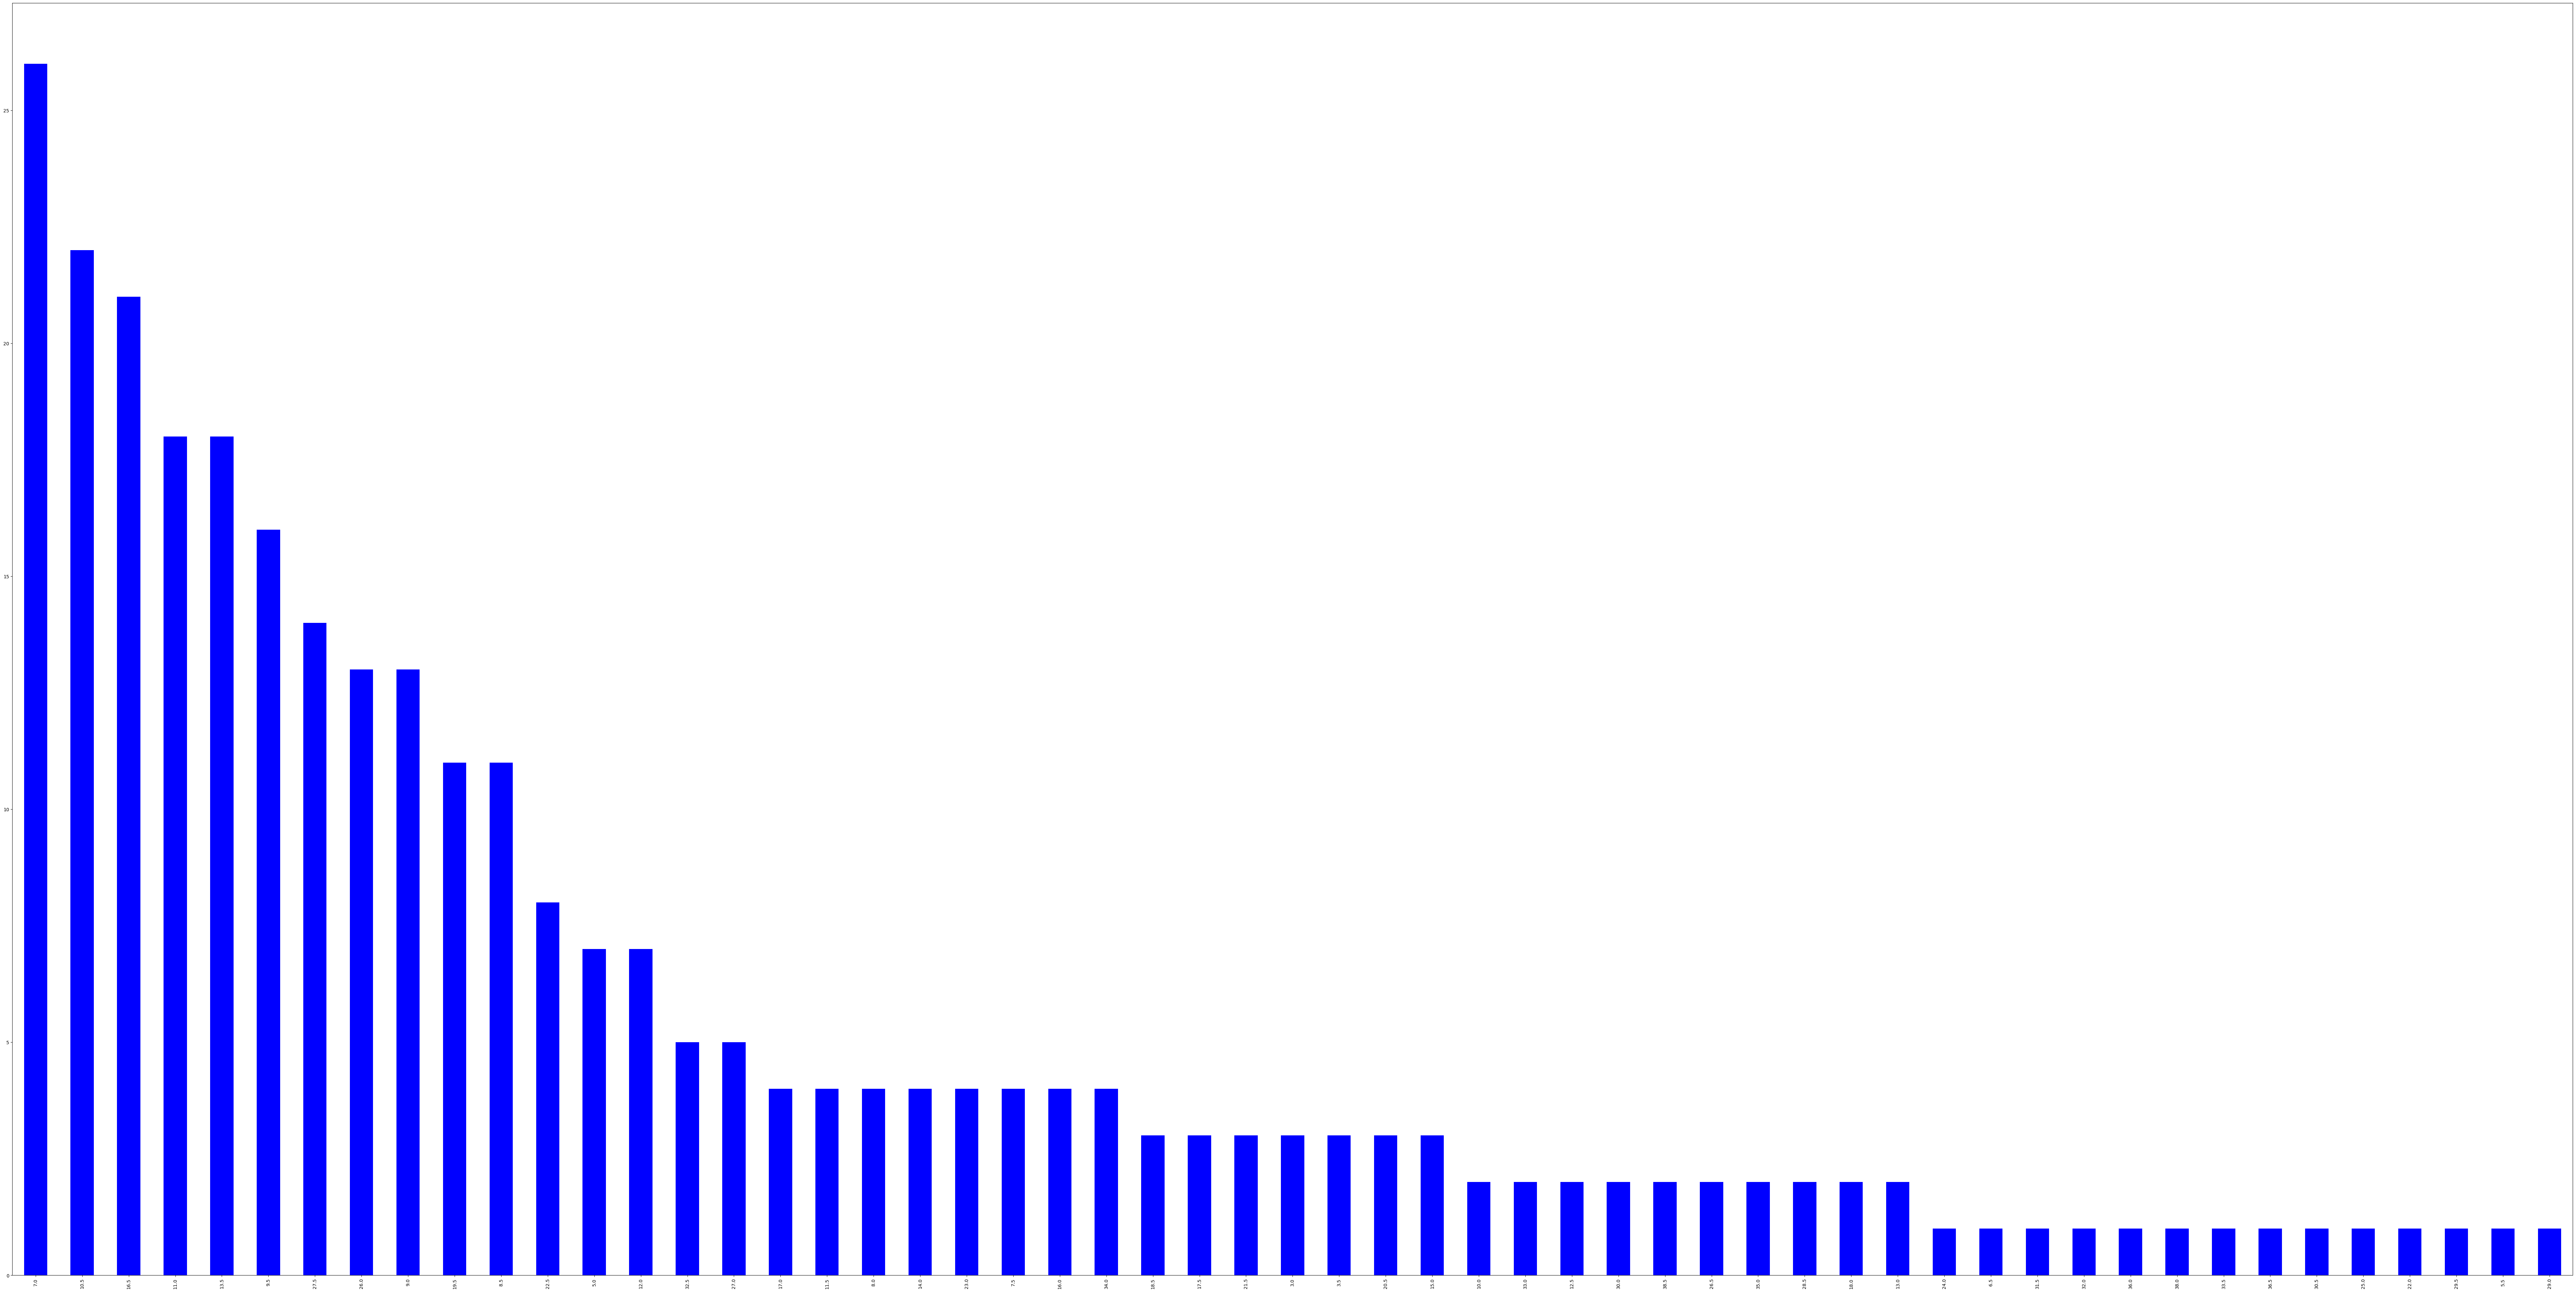

In [35]:
a['price'].value_counts().plot(kind='bar', figsize=(100,50),color='blue')

<Axes: >

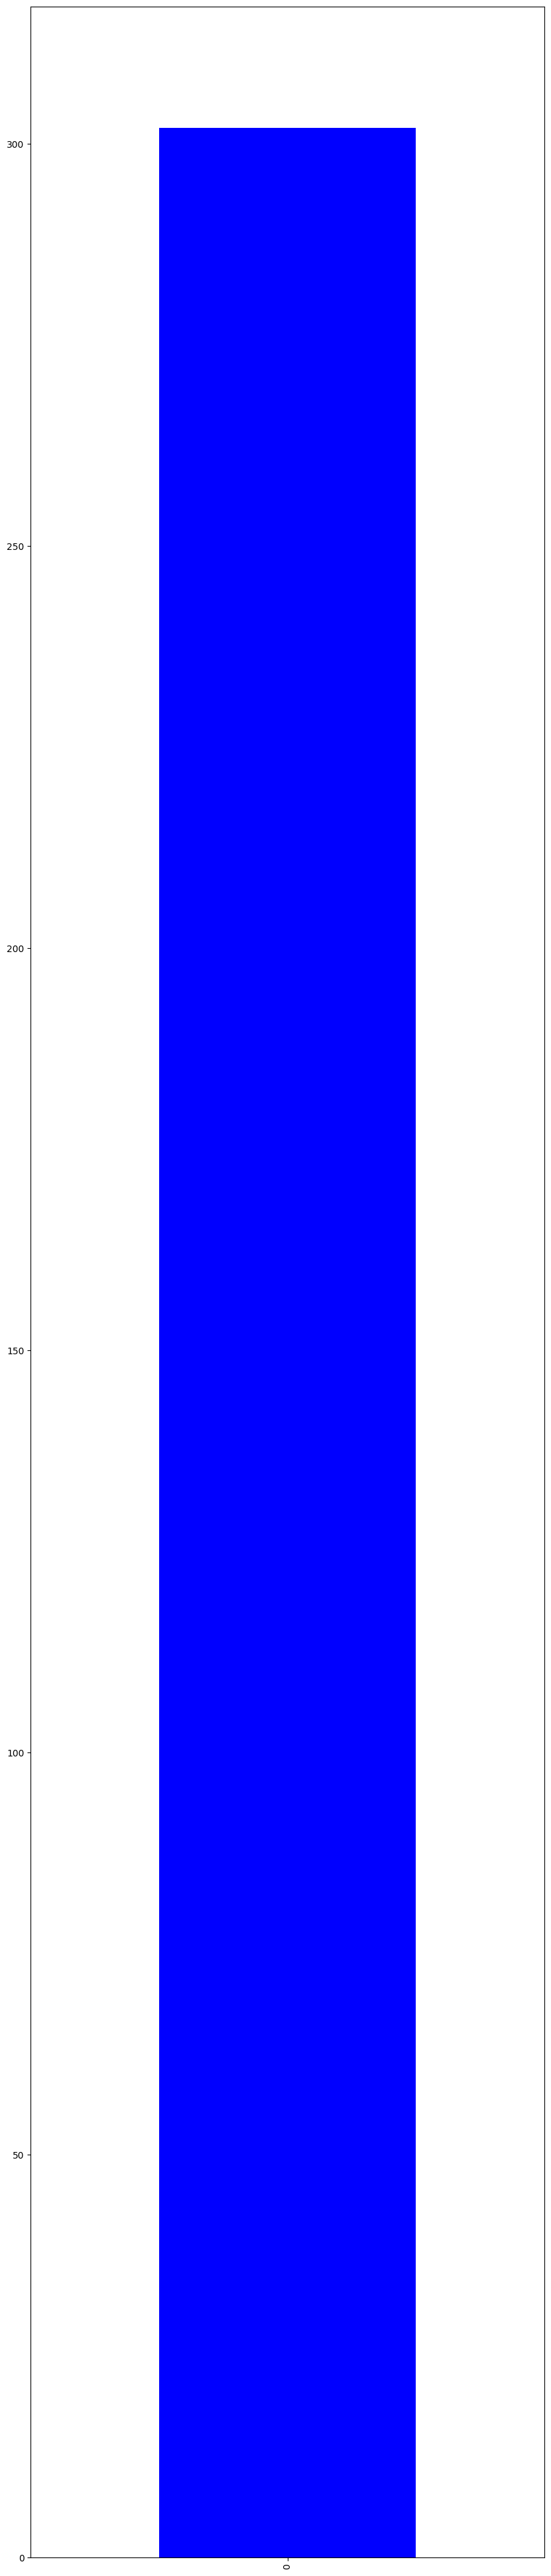

In [36]:
a['hour'].value_counts().plot(kind='bar', figsize=(10,50),color='blue')

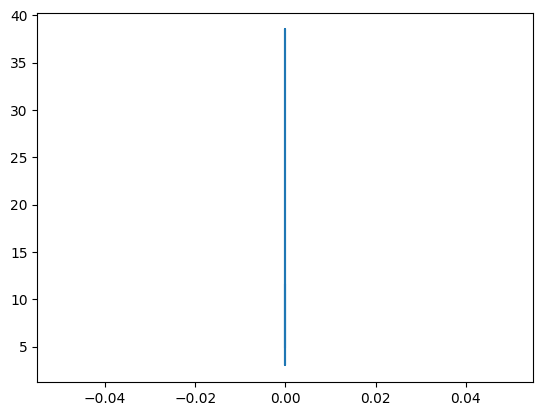

In [37]:
import matplotlib.pyplot as plt
x=a['hour']
y=a['price']
plt.plot(x,y)
plt.show()

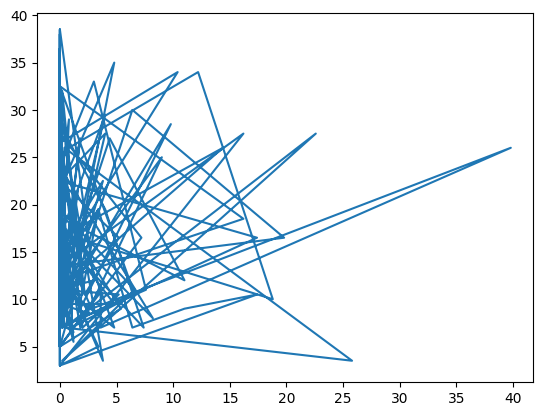

In [38]:
x=a['Rainfall']
y=a['price']
plt.plot(x,y)
plt.show()

In [39]:
a.columns


Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'humidity', 'pressure', 'cloudCover', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [40]:
x1=a[['distance','temperature','cloudCover','pressure','humidity','Rainfall','day','hour','surge_multiplier']]
y1=a['price']

In [41]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test= train_test_split(x1,y1,test_size= 0.25,random_state=42)

In [42]:
linear= LinearRegression()
linear.fit(x_train,x_test)


LinearRegression()

In [43]:
pred = linear.predict(y_train)
pred

array([18.05116257, 11.98479965, 20.32107443, 14.1724212 , 11.93678733,
       14.85748833, 16.31262856, 16.45670559, 18.29052283, 17.69918087,
       10.97505424, 14.3580349 , 13.52034325, 17.89477043, 17.74331829,
       15.47280721, 14.44207872, 19.7166872 , 16.03467462, 13.13691367,
       21.85546413, 12.50432828, 13.92871314, 16.3436766 , 13.66415948,
       17.17655835, 12.77754837, 18.13302857, 13.09555949, 18.69052854,
       11.5025535 , 18.16836214, 16.62112295, 17.3686187 , 14.9549734 ,
       15.22442841, 17.31964044, 18.0160461 , 16.06481927, 11.22160503,
       19.95045651, 18.14492586, 12.0343773 , 18.17303901, 13.45676584,
       16.80431206, 19.06715441, 17.46575649, 16.14596663, 18.64627962,
       11.67699394, 13.85641154, 16.25164402, 17.17606715, 17.54624398,
       18.33821323, 15.21019748, 13.85410432, 11.80737835, 18.85863774,
       15.24087366, 15.85716558, 16.29552722, 20.22439679, 20.58798076,
       19.33890645, 14.16314169, 15.30155281, 13.18680068, 16.36

In [47]:
df=pd.DataFrame({'Actual' : y_test,'Predicted': pred})
df

,Actual,Predicted
214,19.5,18.051163
280,7.0,11.984800
124,26.5,20.321074
303,28.5,14.172421
64,9.5,11.936787
...,...,...
23,26.0,13.836235
316,9.0,15.547066
59,7.0,14.537393
295,27.5,19.017512


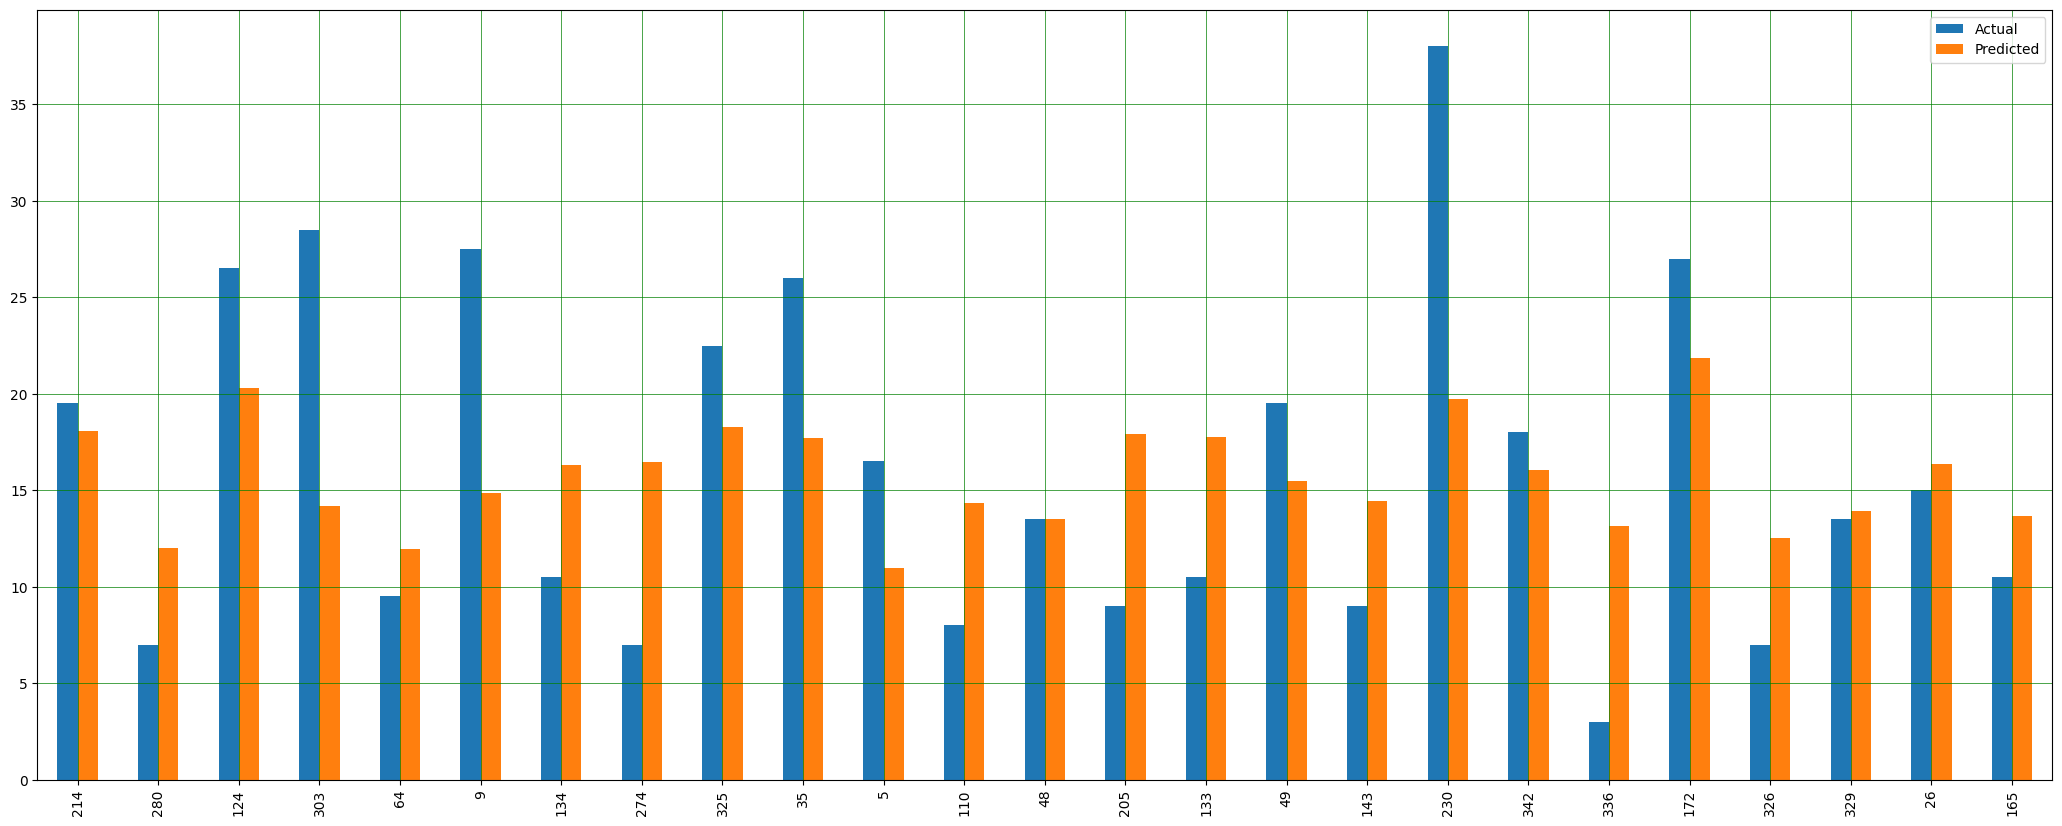

In [48]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

ValueError: ignored